In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/natural_images.zip'


In [21]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import keras
import random
from PIL import Image
from numpy import asarray

In [22]:
def getImagesFromDirectory(train_data_gen, validation_data_gen, directory, image_size=(220,220), batch_size=8, shuffle=True):
    train_dataset = train_data_gen.flow_from_directory(directory,
                                                    target_size=image_size, 
                                                    batch_size=batch_size,
                                                    subset='training',
                                                    class_mode='categorical',
                                                    shuffle=True,
                                                    seed=223)
    validation_dataset = validation_data_gen.flow_from_directory(directory,
                                                          target_size=image_size,
                                                          batch_size=batch_size,
                                                          shuffle=True,
                                                          subset='validation',
                                                          class_mode='categorical',
                                                          seed=223)
    
  
    return train_dataset, validation_dataset

In [23]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    horizontal_flip=True, 
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
    )
validate_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    horizontal_flip=True, 
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
    )

train_dataset, validation_dataset = getImagesFromDirectory(
            train_data_gen=train_datagen,
            validation_data_gen=validate_datagen,
            directory='./natural_images')

Found 5522 images belonging to 8 classes.
Found 1377 images belonging to 8 classes.


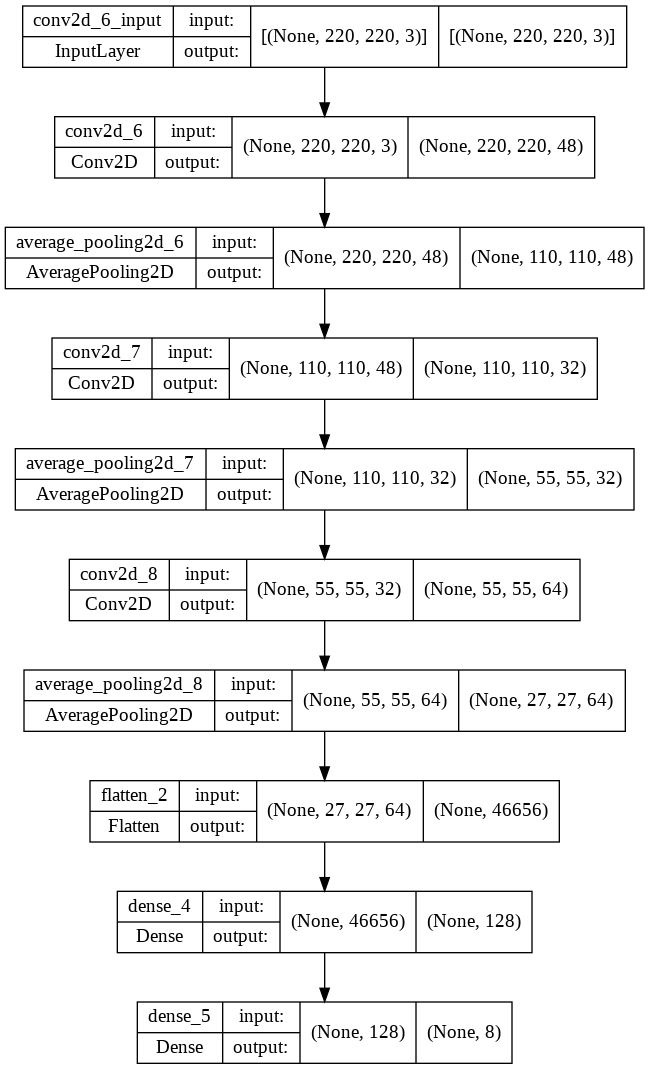

In [15]:
def model1(input_shape, pool_size=(2,2)):
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(48, 2, padding='same', input_shape = input_shape, activation = 'LeakyReLU'))
    model.add(tf.keras.layers.AveragePooling2D(pool_size = pool_size,strides= pool_size))
    
    model.add(tf.keras.layers.Conv2D(32, 3, padding='same', input_shape = input_shape, activation = 'LeakyReLU'))
    model.add(tf.keras.layers.AveragePooling2D(pool_size = pool_size,strides= pool_size))
    
    model.add(tf.keras.layers.Conv2D(64, 2, padding='same', activation = 'LeakyReLU'))
    model.add(tf.keras.layers.AveragePooling2D(pool_size = pool_size,strides= pool_size))
    
    model.add(tf.keras.layers.Flatten(input_shape = (3 ,2)))
    
    model.add(tf.keras.layers.Dense(units = 128, activation = 'LeakyReLU'))
    num_classes = 8
    
    model.add(tf.keras.layers.Dense(units = num_classes, activation = 'softmax'))
    
    return model    

model = model1(input_shape=(220,220) + (3,))

tf.keras.utils.plot_model(model, show_shapes=True)

In [16]:
epochs = 5

model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["categorical_accuracy"],
)

tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph1', histogram_freq=0, write_graph=True, write_images=True)

history = model.fit(
    train_dataset, epochs=epochs, callbacks=[tbCallBack],
    validation_data=validation_dataset
)

Epoch 1/5
691/691 [==============================] - 83s 119ms/step - loss: 1.2575 - categorical_accuracy: 0.5563 - val_loss: 1.1106 - val_categorical_accuracy: 0.6412
Epoch 2/5
691/691 [==============================] - 81s 118ms/step - loss: 0.8232 - categorical_accuracy: 0.7095 - val_loss: 0.8437 - val_categorical_accuracy: 0.7182
Epoch 3/5
691/691 [==============================] - 85s 124ms/step - loss: 0.6724 - categorical_accuracy: 0.7619 - val_loss: 0.9043 - val_categorical_accuracy: 0.7066
Epoch 4/5
691/691 [==============================] - 82s 119ms/step - loss: 0.6432 - categorical_accuracy: 0.7642 - val_loss: 0.6783 - val_categorical_accuracy: 0.7589
Epoch 5/5
691/691 [==============================] - 81s 118ms/step - loss: 0.6202 - categorical_accuracy: 0.7771 - val_loss: 0.7172 - val_categorical_accuracy: 0.7647


In [ ]:
model.save("drive/MyDrive/saved_model/modelone")

In [34]:

val_data = list(zip(validation_dataset.filenames,validation_dataset.classes))

r_i = [i for i in range(0,len(val_data))]

r_d = []
for i in random.sample(r_i, 4):
    r_d.append(val_data[i])

c_i = train_dataset.class_indices

In [36]:
c_i = {v: k for k, v in c_i.items()}


In [37]:


def img_pred(f_n, model):
    image = Image.open("./natural_images/" +f_n[0]).convert('RGB')
    temp = np.array(image)
    plt.imshow(temp)
    plt.show()
    image = image.resize((220,220))
    image = np.array(image)
            

    pic = asarray(image)
    pic = pic.astype('float32')

    pic /= 255.0

    uu = np.array([pic])
    yy = model.predict(uu)
    yy = yy * 100
    print("Actual:", c_i[f_n[1]])
    print("Predicted", c_i[np.argmax((yy)[0])])

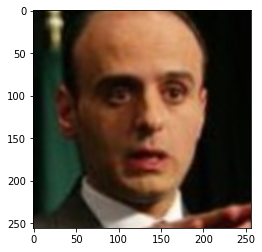

Actual: person
Predicted person


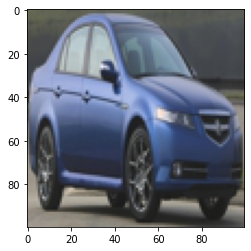

Actual: car
Predicted car


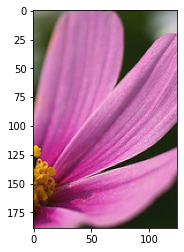

Actual: flower
Predicted flower


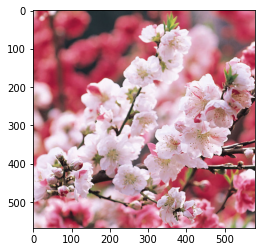

Actual: flower
Predicted motorbike


In [38]:
for i in r_d:
    img_pred(i, model)

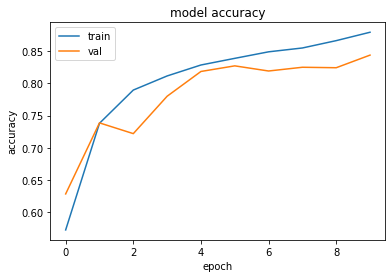

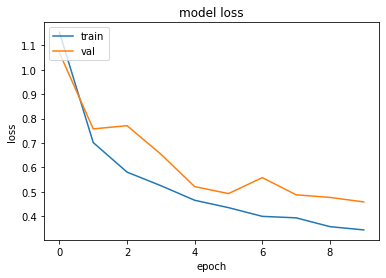

In [39]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

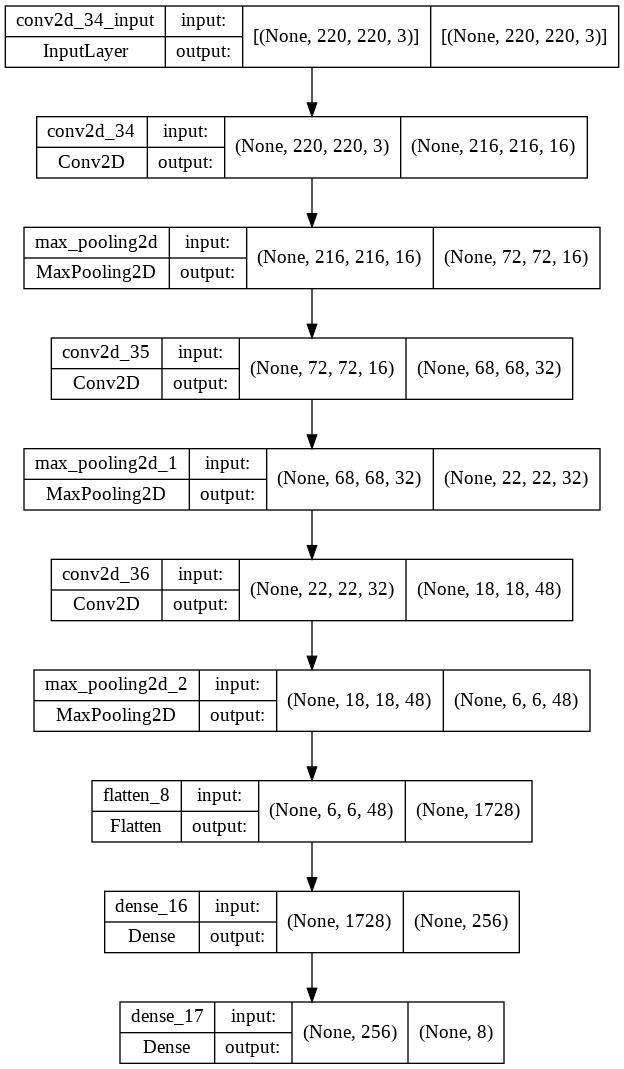

In [29]:
def model2(input_shape, pool_size=(3,3)):
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(16, (5, 5), input_shape = input_shape, activation = 'relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = pool_size, strides= pool_size, padding='valid'))
    
    model.add(tf.keras.layers.Conv2D(32, (5, 5), input_shape = input_shape, activation = 'relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = pool_size, strides= pool_size, padding='valid'))
    
    model.add(tf.keras.layers.Conv2D(48, (5, 5), activation = 'relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = pool_size, strides= pool_size, padding='valid'))
    
    model.add(tf.keras.layers.Flatten(input_shape = (3 ,3)))
    
    model.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))
    num_classes = 8
    
    model.add(tf.keras.layers.Dense(units = num_classes, activation = 'softmax'))
    
    return model    

model = model2(input_shape=(220,220) + (3  ,))
tf.keras.utils.plot_model(model, show_shapes=True)





In [30]:
epochs = 10

model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["categorical_accuracy"],
)

tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph2', histogram_freq=0, write_graph=True, write_images=True)

history = model.fit(
    train_dataset, epochs=epochs, callbacks=[tbCallBack],
    validation_data=validation_dataset
)

Epoch 1/10
691/691 [==============================] - 84s 121ms/step - loss: 1.1534 - categorical_accuracy: 0.5723 - val_loss: 1.0692 - val_categorical_accuracy: 0.6282
Epoch 2/10
691/691 [==============================] - 83s 120ms/step - loss: 0.7014 - categorical_accuracy: 0.7380 - val_loss: 0.7574 - val_categorical_accuracy: 0.7386
Epoch 3/10
691/691 [==============================] - 80s 116ms/step - loss: 0.5804 - categorical_accuracy: 0.7896 - val_loss: 0.7706 - val_categorical_accuracy: 0.7219
Epoch 4/10
691/691 [==============================] - 79s 115ms/step - loss: 0.5249 - categorical_accuracy: 0.8115 - val_loss: 0.6540 - val_categorical_accuracy: 0.7800
Epoch 5/10
691/691 [==============================] - 82s 119ms/step - loss: 0.4651 - categorical_accuracy: 0.8285 - val_loss: 0.5210 - val_categorical_accuracy: 0.8184
Epoch 6/10
691/691 [==============================] - 83s 119ms/step - loss: 0.4349 - categorical_accuracy: 0.8388 - val_loss: 0.4925 - val_categorical_acc

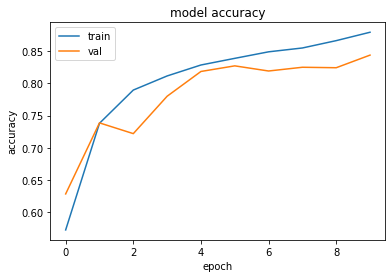

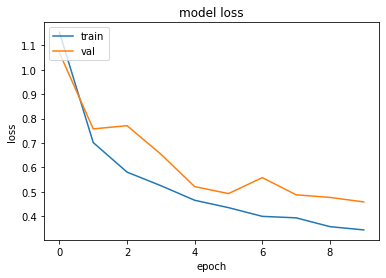

In [31]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [32]:
model.save("drive/MyDrive/saved_model/modeltwo")

INFO:tensorflow:Assets written to: drive/MyDrive/saved_model/modeltwo/assets


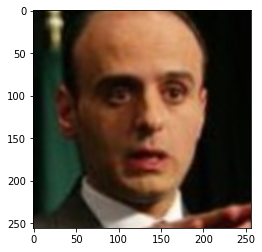

Actual: person
Predicted person


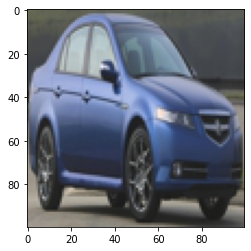

Actual: car
Predicted car


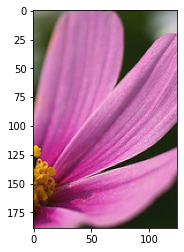

Actual: flower
Predicted flower


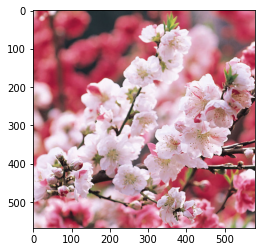

Actual: flower
Predicted motorbike


In [41]:
for i in r_d:
    img_pred(i, model)

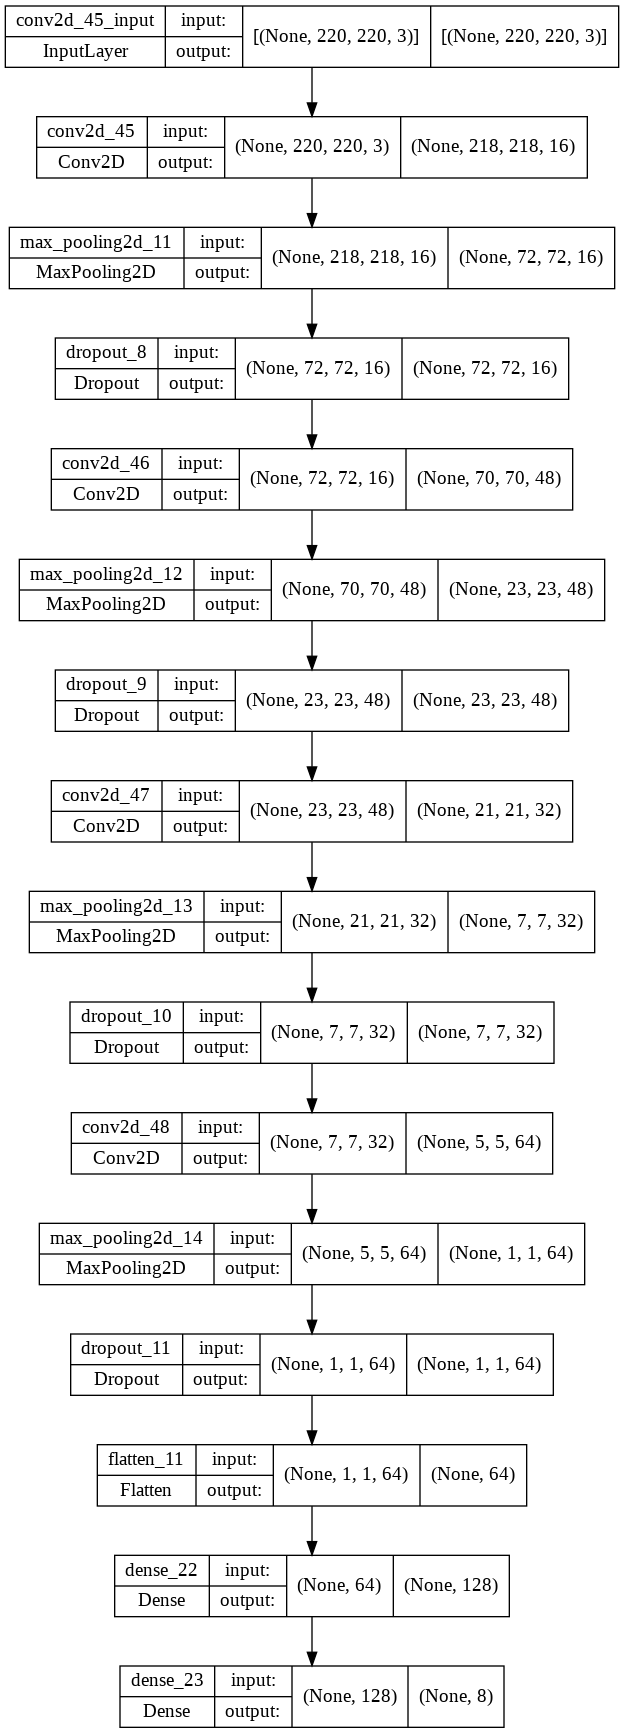

In [50]:
def model3(input_shape, pool_size=(3,3)):
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(16, (3, 3), input_shape = input_shape, activation = 'relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = pool_size,strides=None))
    
    model.add(tf.keras.layers.Dropout(.2))

    model.add(tf.keras.layers.Conv2D(48, (3, 3), input_shape = input_shape, activation = 'relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = pool_size,strides=None))

    model.add(tf.keras.layers.Dropout(.2))


    model.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape = input_shape, activation = 'relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = pool_size,strides=None))

    model.add(tf.keras.layers.Dropout(.2))

    
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = pool_size,strides=None))

    model.add(tf.keras.layers.Dropout(.2))

    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
    num_classes = 8
    
    model.add(tf.keras.layers.Dense(units = num_classes, activation = 'softmax'))
    
    return model    

model = model3(input_shape=(220,220) + (3,))
tf.keras.utils.plot_model(model, show_shapes=True)





In [51]:
epochs = 28

model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["categorical_accuracy"],
)

tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph3', histogram_freq=0, write_graph=True, write_images=True)

history = model.fit(
    train_dataset, epochs=epochs, callbacks=[tbCallBack],
    validation_data=validation_dataset
)

Epoch 1/28
691/691 [==============================] - 78s 112ms/step - loss: 1.4463 - categorical_accuracy: 0.4560 - val_loss: 1.1281 - val_categorical_accuracy: 0.5534
Epoch 2/28
691/691 [==============================] - 78s 112ms/step - loss: 1.0129 - categorical_accuracy: 0.6273 - val_loss: 0.9807 - val_categorical_accuracy: 0.6369
Epoch 3/28
691/691 [==============================] - 78s 113ms/step - loss: 0.8638 - categorical_accuracy: 0.6818 - val_loss: 0.9965 - val_categorical_accuracy: 0.6456
Epoch 4/28
691/691 [==============================] - 78s 113ms/step - loss: 0.7960 - categorical_accuracy: 0.7110 - val_loss: 0.8320 - val_categorical_accuracy: 0.7095
Epoch 5/28
691/691 [==============================] - 77s 112ms/step - loss: 0.7363 - categorical_accuracy: 0.7351 - val_loss: 0.9204 - val_categorical_accuracy: 0.6921
Epoch 6/28
691/691 [==============================] - 84s 121ms/step - loss: 0.6686 - categorical_accuracy: 0.7573 - val_loss: 0.6838 - val_categorical_acc

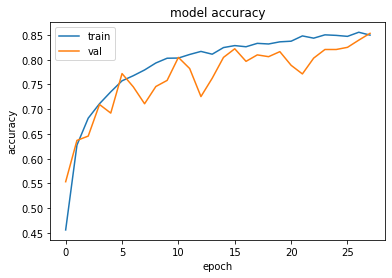

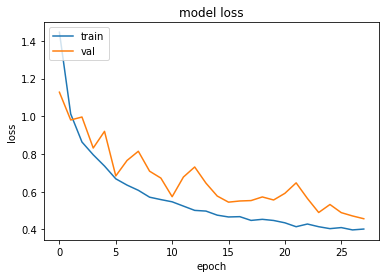

In [53]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [54]:
model.save("drive/MyDrive/saved_model/modelthree")

INFO:tensorflow:Assets written to: drive/MyDrive/saved_model/modelthree/assets


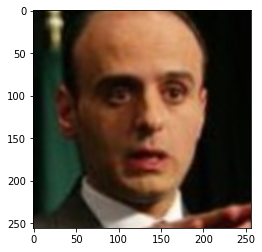

Actual: person
Predicted person


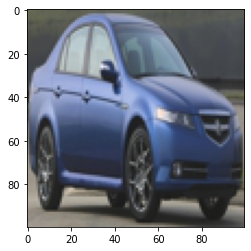

Actual: car
Predicted car


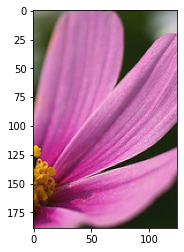

Actual: flower
Predicted flower


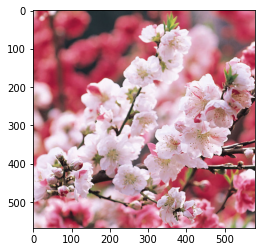

Actual: flower
Predicted flower


In [55]:
for i in r_d:
    img_pred(i, model)